In [25]:
import os, sys

os.getcwd()

'/Users/angadkalra/Projects/dwave_ocean/QuantumComputingProject/MaxClique&MaxIndSet'

In [26]:
# Import libraries and dataframes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = "ftse" # Values: asset_class, sectors, ftse

quant_res_df = pd.read_csv("ISResultCSVs/indset_quant_%s_res.csv" % (dataset))
class_res_df = pd.read_csv("ISResultCSVs/indset_class_%s_res.csv" % (dataset))

quant_res_df = quant_res_df.drop(axis=1, columns=['Unnamed: 0'])
class_res_df = class_res_df.drop(axis=1, columns=['Unnamed: 0'])

In [27]:
assert quant_res_df.shape == class_res_df.shape and quant_res_df.columns.equals(class_res_df.columns)

In [28]:
quant_res_df.columns

Index(['date', 'threshold', 'density', 'max_ind_set', 'set_size',
       'valid_soln'],
      dtype='object')

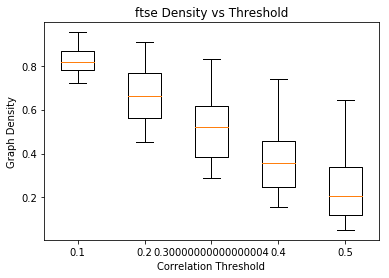

In [29]:
# Plot graph density for each threshold. 

thresh_array = quant_res_df['threshold'].unique()

density_distr = []

for thresh in thresh_array:
    density = quant_res_df[quant_res_df.threshold == thresh]['density']
    density_distr.append(density)
    
plt.boxplot(density_distr, labels=thresh_array)
plt.ylabel("Graph Density")
plt.xlabel("Correlation Threshold")
plt.title("%s Density vs Threshold" % (dataset))
plt.show()

<Figure size 432x288 with 0 Axes>

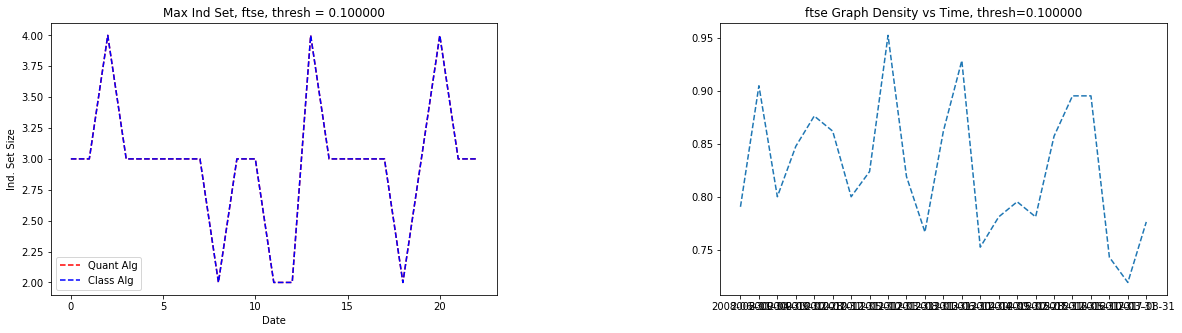

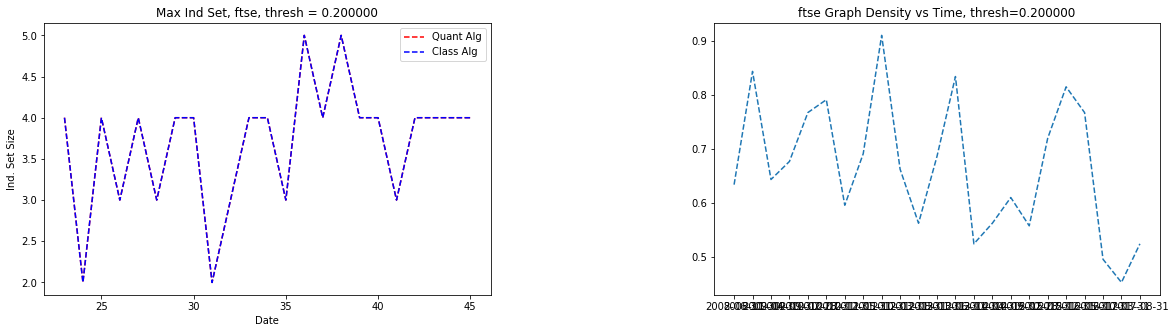

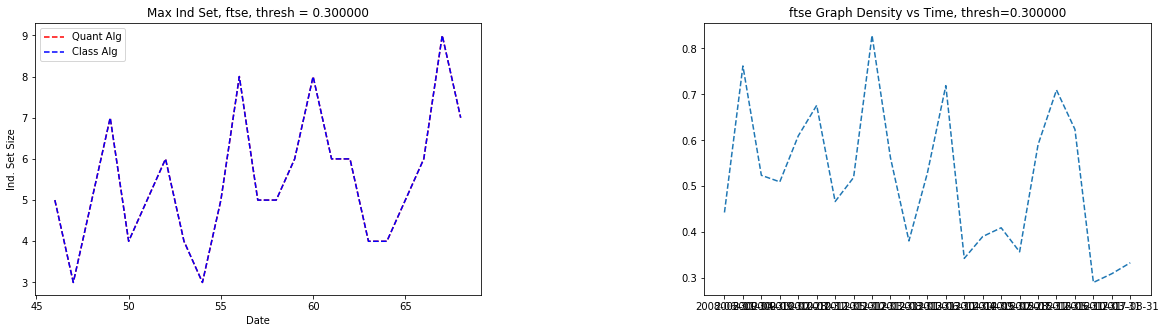

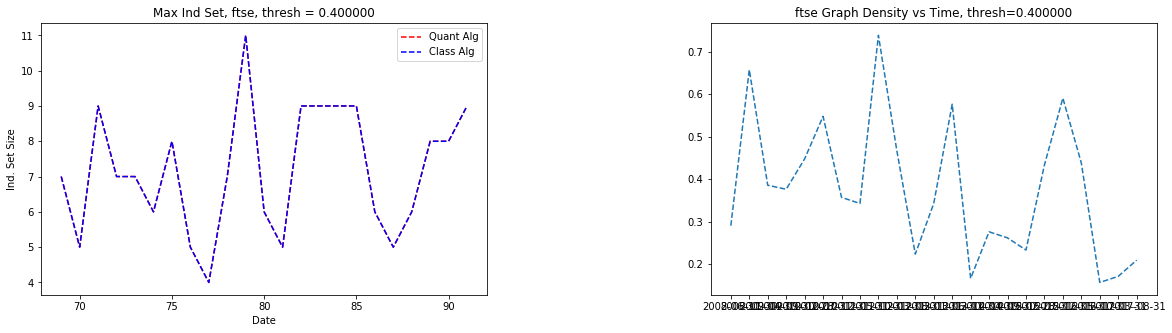

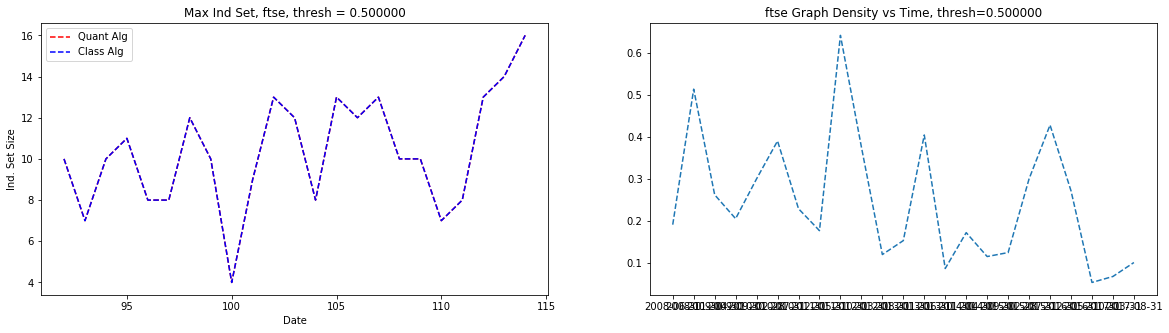

In [30]:
# Plot score vs time for each threshold
thresholds = quant_res_df['threshold'].unique()

i = 1
for thresh in thresholds:
    quant_series = quant_res_df[(quant_res_df.threshold == thresh) & (quant_res_df.valid_soln == True)]
    class_series = class_res_df[(class_res_df.threshold == thresh) & (class_res_df.valid_soln == True)]
    class_series = class_series[class_series['date'].isin(quant_series['date'])]
    
    assert quant_series.shape == class_series.shape
    
    fig = plt.figure(i)
    plt.subplots_adjust(wspace=0.5)
    plt.subplots(figsize=(20,5))
    
    plt.subplot(121)
    plt.title('Max Ind Set, %s, thresh = %f' % (dataset, thresh))
    plt.ylabel('Ind. Set Size')
    plt.xlabel('Date')
    
    plt.plot(quant_series['set_size'], 'r--', label='Quant Alg')
    plt.plot(class_series['set_size'], 'b--', label='Class Alg')
    plt.legend(loc=0)
    
    plt.subplot(122)
    plt.title('%s Graph Density vs Time, thresh=%f' % (dataset, thresh))
    plt.plot(quant_series['date'], quant_series['density'], '--')
    
    plt.savefig('../ReportFiguresPlots/MaxIndSet/%s_score_density_time_thresh_%f.png' % (dataset, thresh))
    
    i += 1